In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
def build_network(m=2, iterations=10):
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2)])

    current_node = 3

    for _ in range(iterations):
        mediator = random.choice(list(G.nodes))

        neighbors = list(G.neighbors(mediator))

        if len(neighbors) < m:
            connections = neighbors
        else:
            connections = random.sample(neighbors, m)

        G.add_node(current_node)
        for neighbor in connections:
            G.add_edge(current_node, neighbor)

        current_node += 1

    return G

In [3]:
m = 2
iterations = 10
network = build_network(m=m, iterations=iterations)

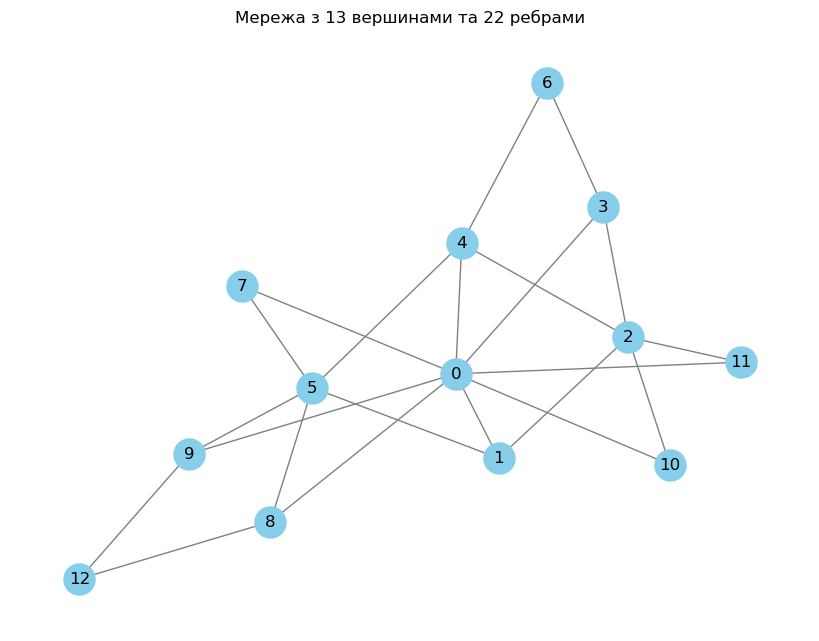

In [4]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(network)  # Розташування вершин графа
nx.draw(network, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title(f"Мережа з {len(network.nodes)} вершинами та {len(network.edges)} ребрами")
plt.show()

In [5]:
from collections import Counter

In [6]:
# Функція для побудови мережі до часу t=8
def build_network_until_t(m=2, t=8):
    # Початкова мережа: три вершини і два ребра
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2)])
    current_node = 3  # Номер нової вершини
    
    # Додаємо вершини до t = 8
    while len(G.nodes) < t:
        mediator = random.choice(list(G.nodes))  # Вибір вершини-посередника
        neighbors = list(G.neighbors(mediator))
        
        # Визначаємо вершини для з'єднання
        if len(neighbors) < m:
            connections = neighbors
        else:
            connections = random.sample(neighbors, m)
        
        G.add_node(current_node)
        for neighbor in connections:
            G.add_edge(current_node, neighbor)
        
        current_node += 1
    
    return G

In [7]:
# Створення мережі до t=8
m = 2
t = 8
network_t8 = build_network_until_t(m=m, t=t)

In [8]:
# Ступені вершин на момент t = 8
degrees = dict(network_t8.degree())
total_degree_sum = sum(degrees.values())

In [9]:
# Ймовірність приєднання нової вершини до кожної вершини
probabilities = {node: degree / total_degree_sum for node, degree in degrees.items()}

degrees, probabilities

({0: 2, 1: 4, 2: 3, 3: 4, 4: 3, 5: 4, 6: 2, 7: 2},
 {0: 0.08333333333333333,
  1: 0.16666666666666666,
  2: 0.125,
  3: 0.16666666666666666,
  4: 0.125,
  5: 0.16666666666666666,
  6: 0.08333333333333333,
  7: 0.08333333333333333})

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Створення мережі з N = 8192 вершин
N = 8192
network_large = build_network_until_t(m=2, t=N)

In [16]:
# Ступені вершин
degrees_large = dict(network_large.degree())
degree_values = list(degrees_large.values())

In [17]:
# Частотний розподіл ступенів
degree_counts = Counter(degree_values)
degrees = np.array(list(degree_counts.keys()))
frequencies = np.array(list(degree_counts.values()))

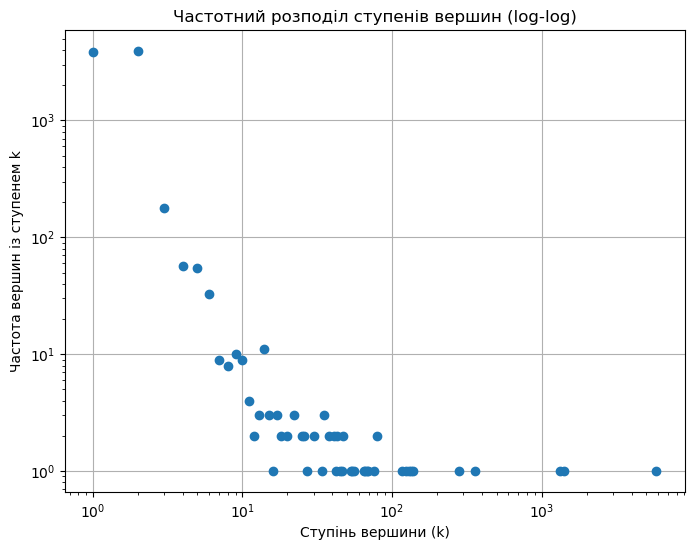

In [18]:
# Графік частотного розподілу у подвійному логарифмічному масштабі
plt.figure(figsize=(8, 6))
plt.loglog(degrees, frequencies, marker='o', linestyle='none')
plt.xlabel("Ступінь вершини (k)")
plt.ylabel("Частота вершин із ступенем k")
plt.title("Частотний розподіл ступенів вершин (log-log)")
plt.grid(True)
plt.show()

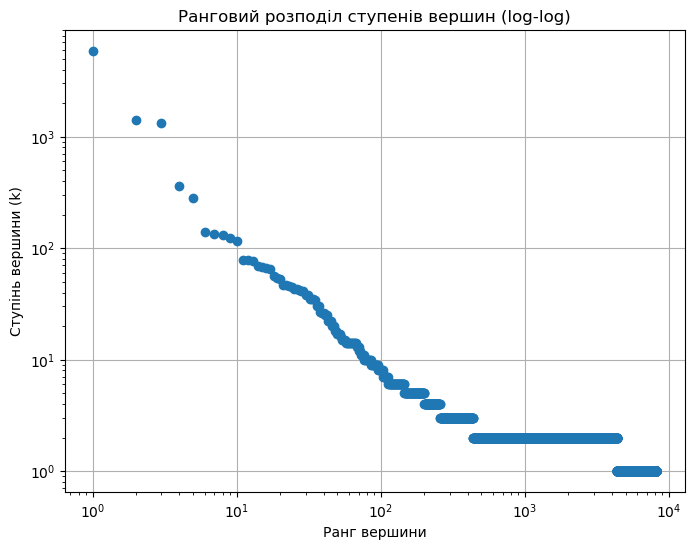

In [19]:
# Графік рангового розподілу
sorted_degrees = sorted(degree_values, reverse=True)
ranks = np.arange(1, len(sorted_degrees) + 1)

plt.figure(figsize=(8, 6))
plt.loglog(ranks, sorted_degrees, marker='o', linestyle='none')
plt.xlabel("Ранг вершини")
plt.ylabel("Ступінь вершини (k)")
plt.title("Ранговий розподіл ступенів вершин (log-log)")
plt.grid(True)
plt.show()

In [20]:
# Оцінка показників скейлінгу
# Частотний розподіл (лінійна апроксимація в log-log масштабі)
log_degrees = np.log(degrees)
log_frequencies = np.log(frequencies)
freq_slope, freq_intercept = np.polyfit(log_degrees, log_frequencies, 1)

In [22]:
# Ранговий розподіл (лінійна апроксимація в log-log масштабі)
log_ranks = np.log(ranks)
log_sorted_degrees = np.log(sorted_degrees)
rank_slope, rank_intercept = np.polyfit(log_ranks, log_sorted_degrees, 1)

scaling_exponent_frequency = -freq_slope
scaling_exponent_rank = -rank_slope

scaling_exponent_frequency, scaling_exponent_rank

(0.8502759078933638, 0.453972321726965)